In [ ]:
from datos import obtenerCapacitancia, obtenerFrecuencia, obtenerInductancia, obtenerResistencias, obtenerVoltaje
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches




In [55]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

fig, ax = plt.subplots()
voltaje = 220
resistencias = [4, 5, 8, 7, 10]
serie = True


ValueError: Image size of 152709x1021 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [4]:
import os
from pathlib import Path
import unicodedata

import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
from matplotlib.ft2font import FT2Font


def print_glyphs(path):
    """
    Print the all glyphs in the given font file to stdout.

    Parameters
    ----------
    path : str or None
        The path to the font file.  If None, use Matplotlib's default font.
    """
    if path is None:
        path = fm.findfont(fm.FontProperties())  # The default font.

    font = FT2Font(path)

    charmap = font.get_charmap()
    max_indices_len = len(str(max(charmap.values())))

    print("The font face contains the following glyphs:")
    for char_code, glyph_index in charmap.items():
        char = chr(char_code)
        name = unicodedata.name(
                char,
                f"{char_code:#x} ({font.get_glyph_name(glyph_index)})")
        print(f"{glyph_index:>{max_indices_len}} {char} {name}")


def draw_font_table(path):
    """
    Draw a font table of the first 255 chars of the given font.

    Parameters
    ----------
    path : str or None
        The path to the font file.  If None, use Matplotlib's default font.
    """
    if path is None:
        path = fm.findfont(fm.FontProperties())  # The default font.

    font = FT2Font(path)
    # A charmap is a mapping of "character codes" (in the sense of a character
    # encoding, e.g. latin-1) to glyph indices (i.e. the internal storage table
    # of the font face).
    # In FreeType>=2.1, a Unicode charmap (i.e. mapping Unicode codepoints)
    # is selected by default.  Moreover, recent versions of FreeType will
    # automatically synthesize such a charmap if the font does not include one
    # (this behavior depends on the font format; for example it is present
    # since FreeType 2.0 for Type 1 fonts but only since FreeType 2.8 for
    # TrueType (actually, SFNT) fonts).
    # The code below (specifically, the ``chr(char_code)`` call) assumes that
    # we have indeed selected a Unicode charmap.
    codes = font.get_charmap().items()

    labelc = [f"{i:X}" for i in range(16)]
    labelr = [f"{i:02X}" for i in range(0, 16*16, 16)]
    chars = [["" for c in range(16)] for r in range(16)]

    for char_code, glyph_index in codes:
        if char_code >= 256:
            continue
        row, col = divmod(char_code, 16)
        chars[row][col] = chr(char_code)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_title(os.path.basename(path))
    ax.set_axis_off()

    table = ax.table(
        cellText=chars,
        rowLabels=labelr,
        colLabels=labelc,
        rowColours=["palegreen"] * 16,
        colColours=["palegreen"] * 16,
        cellColours=[[".95" for c in range(16)] for r in range(16)],
        cellLoc='center',
        loc='upper left',
    )
    for key, cell in table.get_celld().items():
        row, col = key
        if row > 0 and col > -1:  # Beware of table's idiosyncratic indexing...
            cell.set_text_props(font=Path(path))

    fig.tight_layout()
    plt.show()


if __name__ == "__main__":
    from argparse import ArgumentParser

    parser = ArgumentParser(description="Display a font table.")
    parser.add_argument("path", nargs="?", help="Path to the font file.")
    parser.add_argument("--print-all", action="store_true",
                        help="Additionally, print all chars to stdout.")
    args = parser.parse_args()

    if args.print_all:
        print_glyphs(args.path)
    draw_font_table(args.path)

usage: ipykernel_launcher.py [-h] [--print-all] [path]
ipykernel_launcher.py: error: unrecognized arguments: --f=c:\Users\Tutur\AppData\Roaming\jupyter\runtime\kernel-v2-12860U004ITqNnDXC.json


SystemExit: 2

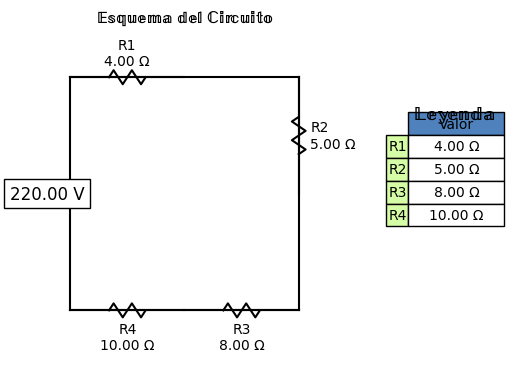

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

fig, ax = plt.subplots()
voltaje = 220
resistencias = [4, 5, 8, 10]
serie = True
rlc = False
XL = 0.4
XC = 0.3

componentes = resistencias
if rlc:
    componentes = [3.4, XL, XC]
    nombres = ['R', 'RL', 'RC']
    leyenda_rows = [r'$R$', r'$X_l$', r'$X_C$']
    leyenda_text = [[3.4], [XL], [XC]]  # Cada lista interna representa una fila de la tabla

else:
    nombres = ['R' + str(i + 1) for i in range(len(resistencias))]
    leyenda_rows=nombres
    leyenda_text=[[f'{r:.2f} Ω'] for r in resistencias]

if serie:
    num_componentes = len(componentes)
    tercio = num_componentes // 3
    resto = num_componentes % 3

    # Línea superior
    for i, (comp, nombre) in enumerate(zip(componentes[:tercio], nombres[:tercio])):
        ax.plot([i / (tercio + 1), (i + 1) / (tercio + 1)], [1, 1], 'k-')
        ax.text((i + 0.5) / (tercio + 1), 1.05, nombre + '\n' + f'{comp:.2f} Ω', ha='center')
        # Rayita
        am = ((i + 0.5) / (tercio + 1))
        x = np.array([am - 0.08, am - 0.06, am - 0.04, am - 0.02, am, am + 0.02, am + 0.04, am + 0.06, am + 0.08])
        y = np.array([1, 1.03, 1, 0.97, 1, 1.03, 1, 0.97, 1])
        ax.plot(x, y, 'k-')  # Alambre

    # Línea derecha
    for i, (comp, nombre) in enumerate(zip(componentes[tercio:2*tercio], nombres[tercio:2*tercio])):
        ax.plot([1, 1], [1 - (i + 1) / (tercio + 1), 1 - i / (tercio + 1)], 'k-')
        ax.text(1.05, 1 - (i + 0.5) / (tercio + 1), nombre + '\n' + f'{comp:.2f} Ω', va='center')
        # alambre
        am = (1 - (i + 0.5) / (tercio + 1))
        x = np.array([1, 1.03, 1, 0.97, 1, 1.03, 1, 0.97, 1])
        y = np.array([am - 0.08, am - 0.06, am - 0.04, am - 0.02, am, am + 0.02, am + 0.04, am + 0.06, am + 0.08])
        ax.plot(x, y, 'k-') 

    # Línea inferior
    for i, (comp, nombre) in enumerate(zip(componentes[2*tercio:], nombres[2*tercio:])):
        ax.plot([1 - i / (tercio + resto), 1 - (i + 1) / (tercio + resto)], [0, 0], 'k-')
        ax.text(1 - (i + 0.5) / (tercio + resto), -0.05, nombre + '\n' + f'{comp:.2f} Ω', ha='center', va='top')
        # alambre
        am = (1 - (i + 0.5) / (tercio + resto))
        x = np.array([am - 0.08, am - 0.06, am - 0.04, am - 0.02, am, am + 0.02, am + 0.04, am + 0.06, am + 0.08])
        y = np.array([0, 0.03, 0, -0.03, 0, 0.03, 0, -0.03, 0])
        ax.plot(x, y, 'k-')  # Alambre
else:  # Paralelo
    num_componentes = len(componentes)
    for i, (comp, nombre) in enumerate(zip(componentes, nombres)):
        y_pos = 1 - i / (num_componentes - 1) if num_componentes > 1 else 0.5
        ax.plot([0, 1], [y_pos, y_pos], 'k-')
        ax.text(0.5, y_pos + 0.08, nombre + '\n' + f'{comp:.2f} Ω', ha='center', va='center')
        # alambre
        y = np.array([y_pos, y_pos + 0.03, y_pos, y_pos - 0.03, y_pos, y_pos + 0.03, y_pos, y_pos - 0.03, y_pos])
        x = np.array([0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58])
        ax.plot(x, y, 'k-')

ax.plot([0, 0], [0, 1], 'k-')  # Línea izquierda
ax.plot([0, 1], [1, 1], 'k-')  # Línea superior
ax.plot([1, 1], [1, 0], 'k-')  # Línea derecha
ax.plot([1, 0], [0, 0], 'k-')  # Línea inferior

# Datos para la leyenda
leyenda_columns = [r'Valor']

# Agregar una tabla en la parte inferior del gráfico
row_colors = ['#D5FDA5'] * len(leyenda_rows)
col_colors = ['#4f81bd']
    # Agregar una tabla en la parte inferior del gráfico
the_table = plt.table(cellText=leyenda_text,
                        rowLabels=leyenda_rows,
                        colLabels=leyenda_columns,
                        colColours=col_colors,
                        cellLoc='center',
                        rowColours=row_colors,
                        bbox=[1.2, 0.4, 0.30, 0.35])

ax.text(1.5, 0.82, r'$\mathbf{\mathbb{Leyenda\;}}$', fontsize=14)  # Ajuste la posición aquí

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

# Ajustar diseño
plt.subplots_adjust(right=0.7)

# Añadir texto del voltaje
ax.text(-0.1, 0.5, f'{voltaje:.2f} V', va='center', ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.axis('off')

plt.title(r'$\mathbf{\mathbb{Esquema\; del\; Circuito\;}}$')
plt.show()


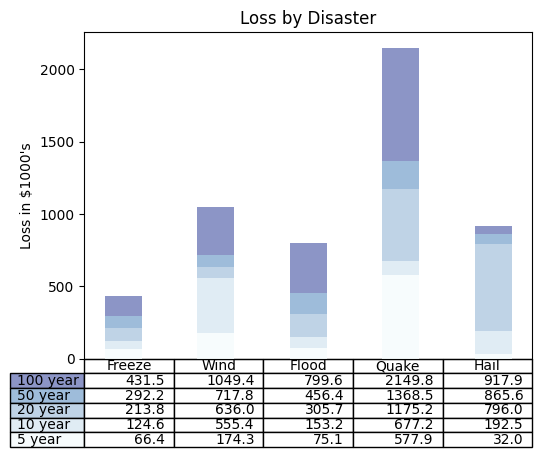

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the Axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel(f"Loss in ${value_increment}'s")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()